In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/sahiyo/PycharmProjects/Data/AirPassengers.csv')
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [3]:
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
df['month'] = df['Month'].dt.month
df['year'] = df['Month'].dt.year
df['day_name'] = df['Month'].dt.day_name()
df['month_name'] = df['Month'].dt.month_name()
df

,Month,#Passengers,month,year,day,day_name,month_name
0,1949-01-01,112,1,1949,Saturday,Saturday,January
1,1949-02-01,118,2,1949,Tuesday,Tuesday,February
2,1949-03-01,132,3,1949,Tuesday,Tuesday,March
3,1949-04-01,129,4,1949,Friday,Friday,April
4,1949-05-01,121,5,1949,Sunday,Sunday,May
...,...,...,...,...,...,...,...
139,1960-08-01,606,8,1960,Monday,Monday,August
140,1960-09-01,508,9,1960,Thursday,Thursday,September
141,1960-10-01,461,10,1960,Saturday,Saturday,October
142,1960-11-01,390,11,1960,Tuesday,Tuesday,November


## DATEUNTIL 使わずともpdでできるんやなー知らんかった。

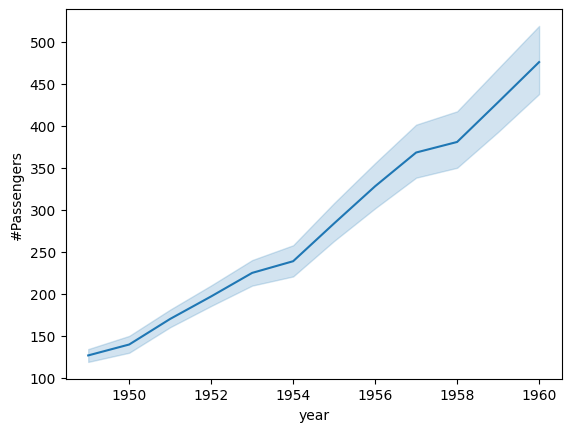

In [40]:
ax = sns.lineplot(data=df,x='year', y='#Passengers')

# 真ん中のラインはMEANで、周りのモヤモヤはConfidence intervalです。
# おはよう　ohayou 信頼区間

In [10]:
df_month = df.groupby('month')[['#Passengers']].agg("sum")
df_month = df_month.reset_index()
df_month.head()

,month,#Passengers
0,1,2901
1,2,2820
2,3,3242
3,4,3205
4,5,3262


## reset は　インデックスの振り直しです。

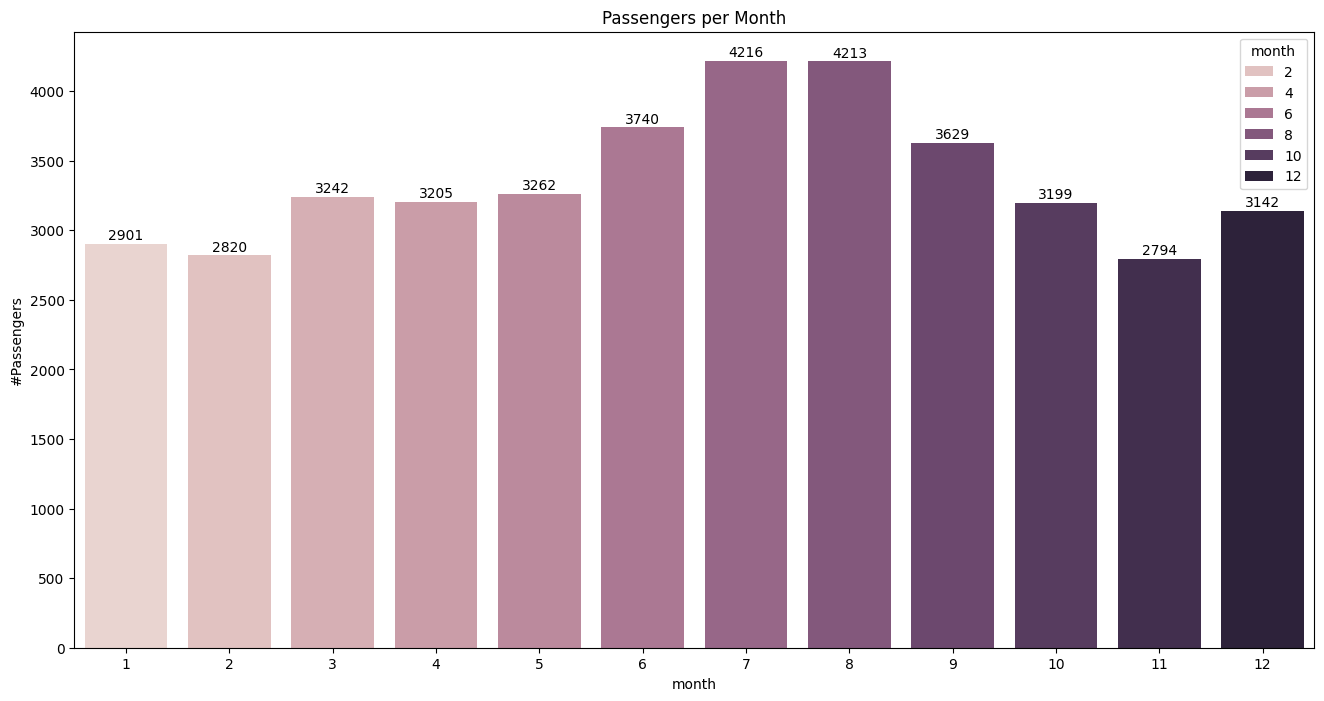

In [25]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x='month', y='#Passengers', data=df_month,hue='month')
ax.set_title('Passengers per Month')

for p,v in zip(ax.patches,df_month['#Passengers']):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2,height+30,v,ha='center')
    

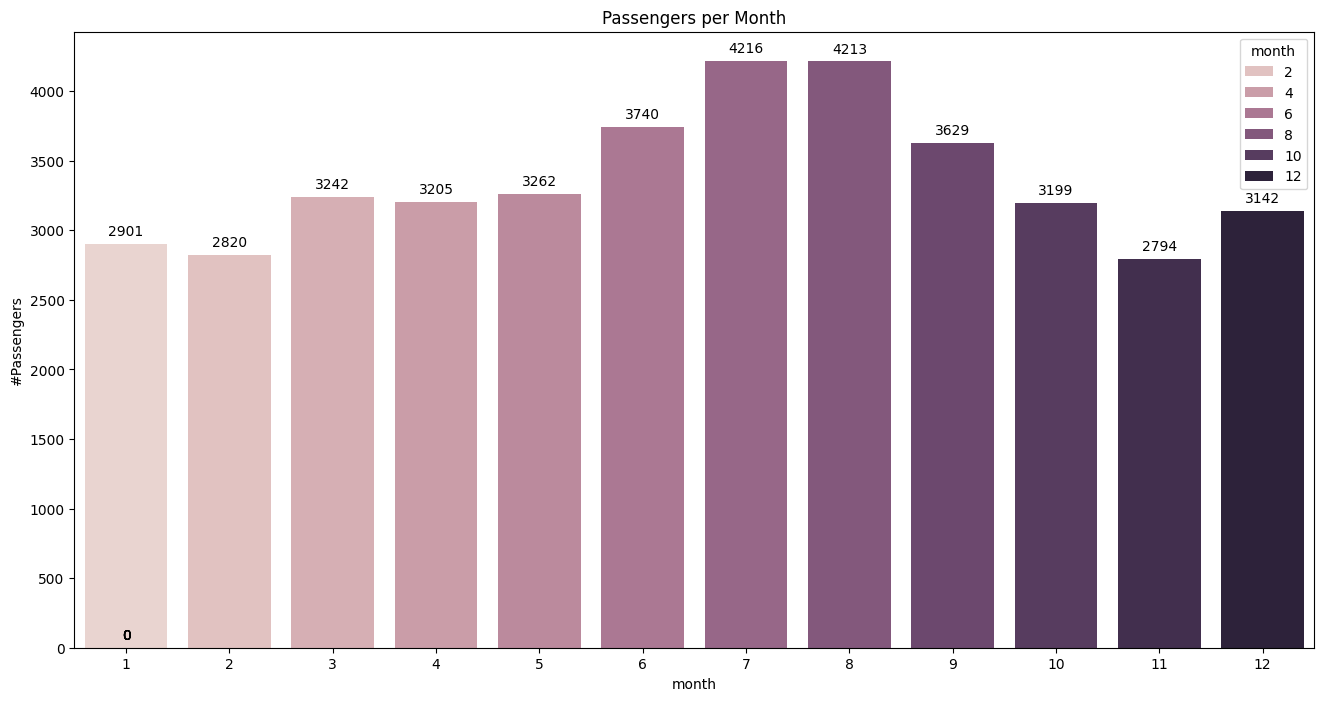

In [26]:

# これはアンドレくんのコードです。
plt.figure(figsize=(16,8))
ax = sns.barplot(x='month', y='#Passengers', data=df_month,hue='month')
ax.set_title('Passengers per Month')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

Text(0.5, 1.0, 'Passengers per year')

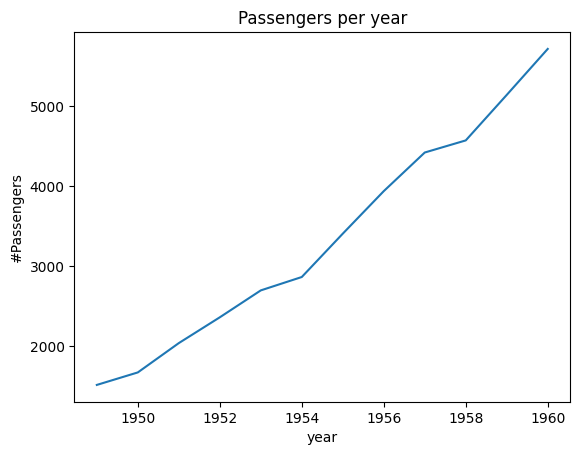

In [34]:
df_year = df.groupby('year')[['#Passengers']].agg("sum")
df_year = df_year.reset_index()

ax = sns.lineplot(data=df_year,x='year', y='#Passengers')
ax.set_title('Passengers per year')